In [1]:
###########################################################################
# Copyright 2024 Aymeric et Maxence
# Created: 2024-11-18
# version: Beta 1.0 - 18 Nov. 2024
# License: GNU GPL-3.0-or-later
###########################################################################

<div style="color:brown;font-family:arial;font-size:20pt;font-weight:bold;text-align:center"> 
    Getting started with the robotic simulator PyBullet</div>

In this notebook, we will simulate the Mini-APTERROS vehicule, base on its URL file description.

# Outline <a name="top"></a>
- [ 1 - Start the Pybullet server](#1)
    - [ 1.1 - Launch PyBullet server with the GUI](#1.1)
    - [ 1.2 - Load the ground plane and the Vehicule](#1.2)
    - [ 1.3 - Useful shorcuts](#1.3)
    - [ 1.4 - Display robot joint properties](#1.4)
- [ 2 - Simulations with Pybullet](#2)
    - [ 2.1 Free run](#2.1)
    - [ 2.2 Take off/landing with the propeller electric turbines](#2.2)

# Import the required modules

In [2]:
import pybullet as p
import pybullet_data
import numpy as np
import os, time
from math import pi
import matplotlib.pyplot as plt
import copy 
from utils.tools import display_joint_properties, welcome
np.set_printoptions(precision=4)

pc = None    # pc : PyBullet connexion

# 1. Start the Pybullet server<a name="1"></a>
## 1.1 - Launch the PyBullet server with the GUI:<a name="1.1"></a>

- `pc = p.connect(p.GUI)` to run Pybullet with a graphical rendering (useful for developing computer programs)
- `pc = p.connect(p.DIRECT)` to run Pybullet in background without any graphical rendering (used for computing stage)
- `p.disconnect(physicsClientId=pc)` to shutdown PyBullet simulation

In [3]:
if pc is None: pc = p.connect(p.GUI)
    
p.configureDebugVisualizer(p.COV_ENABLE_GUI, 0)
p.resetSimulation()
# set some important parameters:
p.setGravity(0,0,-9.81)       # m/s^2
p.setTimeStep(1/240.)         # the simulation time step in secondes

__Run the following cell when you want to distroy the PyBullet window...__

In [4]:
#p.disconnect(physicsClientId=pc)
#pc = None        

print("Restart kernel and re-run the notbook from the beginning...")

Restart kernel and re-run the notbook from the beginning...


[top](#top)

## 1.2 Load the ground plane and the Vehicule <a name="1.2"></a>

In [5]:
os.getcwd ()

'c:\\Users\\aymer\\PJT_Mini_Apterros\\miniapterros2\\apterros\\pybullet'

In [6]:
urdf = "./URDF_design/URDFf-creator/URDF__40.urdf"

In [7]:
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # used by loadURDF
planeId = p.loadURDF("plane.urdf")

startPos = [0, 0, 0.5]
startOrientation = p.getQuaternionFromEuler([0.0, 0, 0])
vehicule  = p.loadURDF(urdf, startPos, startOrientation)

In [8]:
p.resetDebugVisualizerCamera(cameraDistance=2.5, cameraYaw=45, 
                                     cameraPitch=10, 
                                     cameraTargetPosition=[0, 0, 0.5])

In [9]:
p.getBasePositionAndOrientation(vehicule)

((0.0, 0.0, 0.5), (0.0, 0.0, 0.0, 1.0))

[top](#top)

### Useful shorcuts

In [10]:
welcome()


################################################################################
# Welcome to this practical session with Pybullet & URDF.
# Pybullet windows shortcuts:
#    G: close/open the tabs
#    W: switch between solid/wireframe rendering
#    J: show/hide links & joints frames as RGB lines (with wireframe rendering actvated)
#    K: show/hide joint axes as a black line         (with wireframe rendering actvated)
#    A: show/hide collision boxes                    (with wireframe rendering actvated)
#    CTRL+left_clic  : rotate the robot
#    CRTL+midlle_clic: translate the robot
#    Mouse_wheel: zoom/unzoom
################################################################################



[top](#top)

## 1.3 Display robot joint properties <a name="1.3"></a>

Displaying the joints properties is useful to see their indexes and their main properties:

In [11]:
p.getNumJoints(vehicule)

38

In [12]:
display_joint_properties(vehicule)

Infos on joint index <0>
	jointIndex      :0
	jointName       :b'base_link_to_tube_Est'
	jointType       :4
	qIndex          :-1
	uIndex          :-1
	flags           :0
	jointDamping    :0.0
	jointFriction   :0.0
	jointLowerLimit :0.0
	jointUpperLimit :-1.0
	jointMaxForce   :0.0
	jointMaxVelocity:0.0
	linkName        :b'tube_Est'
	jointAxis       :(0.0, 0.0, 0.0)

Infos on joint index <1>
	jointIndex      :1
	jointName       :b'base_link_to_tube_West'
	jointType       :4
	qIndex          :-1
	uIndex          :-1
	flags           :0
	jointDamping    :0.0
	jointFriction   :0.0
	jointLowerLimit :0.0
	jointUpperLimit :-1.0
	jointMaxForce   :0.0
	jointMaxVelocity:0.0
	linkName        :b'tube_West'
	jointAxis       :(0.0, 0.0, 0.0)

Infos on joint index <2>
	jointIndex      :2
	jointName       :b'base_link_to_tube_North'
	jointType       :4
	qIndex          :-1
	uIndex          :-1
	flags           :0
	jointDamping    :0.0
	jointFriction   :0.0
	jointLowerLimit :0.0
	jointUpperLimit :-1.0
	

In [13]:
# pos1: linkWorldPosition -> Cartesian position of center of mass
# q1: linkWorldOrientation -> Cartesian orientation of center of mass, in quaternion [x,y,z,w]
#
# pos2: localInertialFramePosition 
#       -> local position offset of inertial frame (center of mass) expressed in the URDF link frame
# q2:   localInertialFrameOrientationvec 
#       -> local orientation (quaternion [x,y,z,w]) offset ofthe inertial frame expressed in URDF link frame.
#
# pos3: worldLinkFramePosition -> world position of the URDF link frame
# q3:   worldLinkFrameOrientation -> world orientation of the URDF link frame
#
np.set_printoptions(precision=3)

for i  in range(p.getNumJoints(vehicule)):
    joint_info = p.getJointInfo(vehicule, i)
    link_state = p.getLinkState(vehicule, i)
    pos1, q1, pos2, q2, pos3, q3 = link_state
    print(f"Link #{i:3d} <{str(joint_info[12])}>")
    print(f"linkWorldPosition:         {np.array(pos1)}\n"
          f"localInertialFramePosition:{np.array(pos2)}\n"
          f"worldLinkFramePosition:    {np.array(pos3)}\n")
    
    

Link #  0 <b'tube_Est'>
linkWorldPosition:         [0.08 0.   0.7 ]
localInertialFramePosition:[0.  0.  0.2]
worldLinkFramePosition:    [0.08 0.   0.5 ]

Link #  1 <b'tube_West'>
linkWorldPosition:         [-8.000e-02  1.588e-22  7.000e-01]
localInertialFramePosition:[0.  0.  0.2]
worldLinkFramePosition:    [-8.000e-02  1.588e-22  5.000e-01]

Link #  2 <b'tube_North'>
linkWorldPosition:         [0.   0.08 0.7 ]
localInertialFramePosition:[0.  0.  0.2]
worldLinkFramePosition:    [0.   0.08 0.5 ]

Link #  3 <b'tube_South'>
linkWorldPosition:         [ 0.   -0.08  0.7 ]
localInertialFramePosition:[0.  0.  0.2]
worldLinkFramePosition:    [ 0.   -0.08  0.5 ]

Link #  4 <b'foot_Est'>
linkWorldPosition:         [0.25 0.   0.25]
localInertialFramePosition:[0. 0. 0.]
worldLinkFramePosition:    [0.25 0.   0.25]

Link #  5 <b'foot_West'>
linkWorldPosition:         [-2.500e-01  2.118e-22  2.500e-01]
localInertialFramePosition:[0. 0. 0.]
worldLinkFramePosition:    [-2.500e-01  2.118e-22  2.500e-01]

Filter the ouput to get info only on links that contain "propeller_up" in their name:

In [14]:
# pos1: linkWorldPosition -> Cartesian position of center of mass
# q1: linkWorldOrientation -> Cartesian orientation of center of mass, in quaternion [x,y,z,w]
#
# pos2: localInertialFramePosition 
#       -> local position offset of inertial frame (center of mass) expressed in the URDF link frame
# q2:   localInertialFrameOrientationvec 
#       -> local orientation (quaternion [x,y,z,w]) offset ofthe inertial frame expressed in URDF link frame.
#
# pos3: worldLinkFramePosition -> world position of the URDF link frame
# q3:   worldLinkFrameOrientation -> world orientation of the URDF link frame
#
np.set_printoptions(precision=3)

for i  in range(p.getNumJoints(vehicule)):
    joint_info = p.getJointInfo(vehicule, i)
    if 'turbine' not in str(joint_info[12]): continue
    link_state = p.getLinkState(vehicule, i)
    pos1, q1, pos2, q2, pos3, q3 = link_state
    print(f"Link #{i:3d} <{str(joint_info[12])}>")
    print(f"linkWorldPosition:         {np.array(pos1)}\n"
          f"localInertialFramePosition:{np.array(pos2)}\n"
          f"worldLinkFramePosition:    {np.array(pos3)}\n")
    
    

Link # 12 <b'Est_anti_roll_turbine'>
linkWorldPosition:         [0.09 0.   0.7 ]
localInertialFramePosition:[0. 0. 0.]
worldLinkFramePosition:    [0.09 0.   0.7 ]

Link # 13 <b'West_anti_roll_turbine'>
linkWorldPosition:         [-0.09  0.    0.7 ]
localInertialFramePosition:[0. 0. 0.]
worldLinkFramePosition:    [-0.09  0.    0.7 ]

Link # 14 <b'North_anti_roll_turbine'>
linkWorldPosition:         [0.   0.09 0.7 ]
localInertialFramePosition:[0. 0. 0.]
worldLinkFramePosition:    [0.   0.09 0.7 ]

Link # 15 <b'South_anti_roll_turbine'>
linkWorldPosition:         [ 0.   -0.09  0.7 ]
localInertialFramePosition:[0. 0. 0.]
worldLinkFramePosition:    [ 0.   -0.09  0.7 ]



<div style="color:brown;font-family:arial;font-size:16pt;font-weight:bold"> 
    From this output we can see that the indexes of the turbines are : 12, 13 14 & 15
    </div>

[top](#top)

# 2. Simulations with Pybullet<a name="2"></a>

## 2.1 Release the vehicule position on the ground<a name="2.1"></a>

the vehicle is slightly lifted then released so that its feet freely come back into contact with the ground.

In [15]:
print("Going to the start position...")
# disable the motor control motion for the 2 revolute joints:
p.setJointMotorControl2(vehicule, 23, controlMode=p.VELOCITY_CONTROL, force=0)
p.setJointMotorControl2(vehicule, 24, controlMode=p.VELOCITY_CONTROL, force=0)

startPos = [0, 0, 1]  # z is 1 instead of 0.5...
startOrient = p.getQuaternionFromEuler([0.0, 0, 0])
p.resetBasePositionAndOrientation(vehicule, startPos, startOrient)
# now let the gravity do thejob:
"""""
step = 0
while True:
    p.stepSimulation()
    keys = p.getKeyboardEvents(physicsClientId=pc)
    if ord('q') in keys and keys[ord('q')] & p.KEY_WAS_TRIGGERED:
        break
    time.sleep(1/240)
    
    # force the simulation to end, even if you haven't press 
    # the [Q] key in the simulation window...
    step += 1
    print(f"\r{step}", end='')
    if step >= 200: break
"""

Going to the start position...


'""\nstep = 0\nwhile True:\n    p.stepSimulation()\n    keys = p.getKeyboardEvents(physicsClientId=pc)\n    if ord(\'q\') in keys and keys[ord(\'q\')] & p.KEY_WAS_TRIGGERED:\n        break\n    time.sleep(1/240)\n    \n    # force the simulation to end, even if you haven\'t press \n    # the [Q] key in the simulation window...\n    step += 1\n    print(f"\r{step}", end=\'\')\n    if step >= 200: break\n'

In [16]:
getBasePositionAndOrientation0 = p.getBasePositionAndOrientation(vehicule)
print(p.getBasePositionAndOrientation(vehicule)[0])
print(p.getBasePositionAndOrientation(vehicule)[1])

(0.0, 0.0, 1.0)
(0.0, 0.0, 0.0, 1.0)


[top](#top)

## 2.2  Take off/landing with the propeller electric turbines<a name="2.2"></a>

Find out the value of thrust that make the vehicule take off:

In [40]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)


 
step  = 0
step2 = 0
coeff = 1
force_couple = 6.7
force_acw=0
force_cw=0
Z, F = [], []
R , Pitch , Y = [], [], []
#z_target = 1.5

#startPos = [0.00, 0.00, 1]
#startOrient = p.getQuaternionFromEuler([0.0, 0, 0])
startPos = getBasePositionAndOrientation0[0]
startOrient = getBasePositionAndOrientation0[1]
p.resetBasePositionAndOrientation(vehicule, startPos, startOrient)

pos_orient  = p.getBasePositionAndOrientation(vehicule)
print(f"sart pos:{pos_orient }")

z_init = pos_orient[0][2]
print(f"Intial z-pos of plate0: {z_init}")

taking_off = False
while True:
    p.setJointMotorControl2(vehicule, 23, controlMode=p.VELOCITY_CONTROL, targetVelocity = 0, force=500)
    p.setJointMotorControl2(vehicule, 24, controlMode=p.VELOCITY_CONTROL, targetVelocity = 0, force=500)
    p.applyExternalForce(vehicule, 12, [0, 0, force_acw/2], [0, 0, 0], p.LINK_FRAME)
    p.applyExternalForce(vehicule, 13, [0, 0, force_acw/2], [0, 0, 0], p.LINK_FRAME)
    p.applyExternalForce(vehicule, 14, [0, 0, force_cw/2], [0, 0, 0], p.LINK_FRAME)
    p.applyExternalForce(vehicule, 15, [0, 0, force_cw/2], [0, 0, 0], p.LINK_FRAME)
    p.applyExternalTorque(vehicule, 25, [0, 0, force_couple], p.LINK_FRAME)
    p.stepSimulation()
    
    pos_orient = p.getBasePositionAndOrientation(vehicule)
    pos = np.array(pos_orient[0])
    orient = np.array(pos_orient[1])
    z = pos[2]
    pos2=copy.copy(pos)
        
    
    Z.append(z)
    r , pitch , y = p.getEulerFromQuaternion(orient)
    R.append(r)
    Pitch.append(pitch)
    Y.append(y)
    
    keys = p.getKeyboardEvents(physicsClientId=pc)
    if ord('q') in keys and keys[ord('q')] & p.KEY_WAS_TRIGGERED:
        break
    time.sleep(1./240.)
    step += 1
    p.resetBasePositionAndOrientation(vehicule,[0., 0.,  1.],orient)
    print(f"step:{step:4d}, pos:{pos} - {orient}", coeff)
    if step > 1680: break



sart pos:((0.0, 0.0, 1.0), (0.0, 0.0, 0.0, 1.0))
Intial z-pos of plate0: 1.0
step:   1, pos:[-0.  0.  1.] - [-0.    -0.     0.001  1.   ] 1
step:   2, pos:[-0.  0.  1.] - [-0.    -0.     0.002  1.   ] 1
step:   3, pos:[-0.  0.  1.] - [-0.    -0.     0.002  1.   ] 1
step:   4, pos:[-0.  0.  1.] - [-0.    -0.     0.003  1.   ] 1
step:   5, pos:[-0.  0.  1.] - [-0.    -0.     0.004  1.   ] 1
step:   6, pos:[-0.  0.  1.] - [-0.    -0.     0.005  1.   ] 1
step:   7, pos:[-0.  0.  1.] - [-0.    -0.     0.006  1.   ] 1
step:   8, pos:[-0.  0.  1.] - [-0.    -0.     0.006  1.   ] 1
step:   9, pos:[-0.  0.  1.] - [-0.    -0.     0.007  1.   ] 1
step:  10, pos:[-0.  0.  1.] - [-0.    -0.     0.008  1.   ] 1
step:  11, pos:[-0.  0.  1.] - [-0.    -0.     0.009  1.   ] 1
step:  12, pos:[-0.  0.  1.] - [-0.   -0.    0.01  1.  ] 1
step:  13, pos:[-0.  0.  1.] - [-0.   -0.    0.01  1.  ] 1
step:  14, pos:[-0.  0.  1.] - [-0.    -0.     0.011  1.   ] 1
step:  15, pos:[-0.  0.  1.] - [-0.    -0.     0.

In [29]:
p.disconnect(physicsClientId=pc)
pc = None        

print("Restart kernel if you want to re-run the notbook from the beginning...")

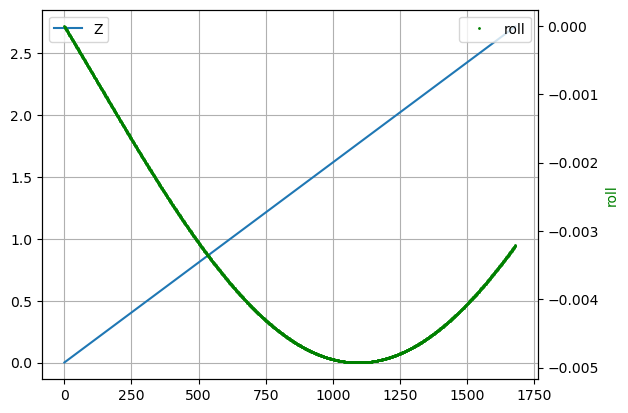

In [41]:
#Z = [ z[0][2] for z in pos]
plt.figure()
plt.plot(Y, label='Z')
#plt.ylim(0,1.7)
plt.grid()
plt.legend()

plt.twinx()
#plt.ylim(0,10000)
plt.plot(R,'.g', markersize=2, label='roll')
plt.ylabel('roll', color='g')
plt.legend()

In [ ]:
p.disconnect(physicsClientId=pc)
pc = None        

print("Restart kernel if you want to re-run the notbook from the beginning...")

[top](#top)